In [7]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from PIL import Image
import json
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import data_utilities.aug_util as aug
import data_utilities.wv_util as wv

In [24]:
with open('maskrcnn-benchmark/results/inference/xview_train_small/bbox.json', 'r') as fin:
    bbox = json.load(fin)

with open('xview_data/annotations_small/train.json', 'r') as fin:
    ann = json.load(fin)
    bbox2 = ann['annotations']

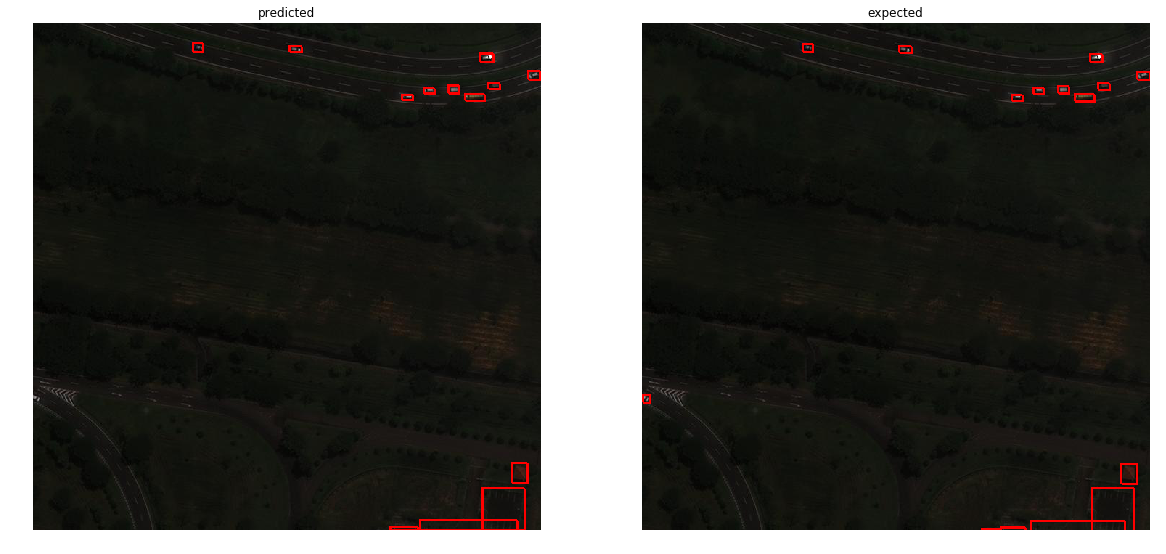

In [43]:
image_id = 1

def xywh_to_xyxy(box):
    return [box[0],box[1],box[0]+box[2],box[1]+box[3]]

fig,ax = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(20)

img = np.array(Image.open('xview_data/train_small/{}.jpg'.format(image_id)))
boxes = [xywh_to_xyxy(d['bbox']) for d in bbox if d['image_id'] == image_id]
img = aug.draw_bboxes(img, boxes)
plt.subplot(1,2,1)
plt.axis('off')
plt.title('predicted')
plt.imshow(img)

img = np.array(Image.open('xview_data/train_small/{}.jpg'.format(image_id)))
boxes = [xywh_to_xyxy(d['bbox']) for d in bbox2 if d['image_id'] == image_id]
img = aug.draw_bboxes(img, boxes)
plt.subplot(1,2,2)
plt.axis('off')
plt.title('expected')
plt.imshow(img)